Analyze the trends 

Imports

In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from matplotlib.patches import FancyBboxPatch
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
import math

Setup

In [5]:
# multiplies the inner radius for easier viewing
inner_radius_modify = 1.3
inner_text_radius = 1.1

# colors

palette = 'orangeblue'
if palette == "blue":
    conf_colors_dict = {
        'S&P':'steelblue' ,
        'Usenix': 'skyblue',
        'CCS': 'paleturquoise',
        'NDSS': 'cornflowerblue'
    }
elif palette == "orangeblue":
    conf_colors_dict = {
        'S&P':'#E8891D' ,
        'Usenix': '#B35A20',
        'CCS': '#05a3a4',
        'NDSS': '#006373'
    }

if palette == 'blue':
    small_palette = [
        'mediumaquamarine',
        'royalblue',
        'mediumpurple'
    ]
elif palette == 'orangeblue':
    small_palette = [
        '#006373',
        '#E8891D',
        '#219ebc',
#         '#05A3A4',
        #'#EA652C'
    ]

Code Available

S&P avail in 20: 28
S&P avail in 21: 64
S&P avail in 22: 72
S&P avail in 23: 65
Usenix avail in 20: 22
Usenix avail in 21: 45
Usenix avail in 22: 47
Usenix avail in 23: 60
CCS avail in 20: 60
CCS avail in 21: 39
CCS avail in 22: 50
CCS avail in 23: 75
NDSS avail in 20: 40
NDSS avail in 21: 48
NDSS avail in 22: 33
NDSS avail in 23: 72


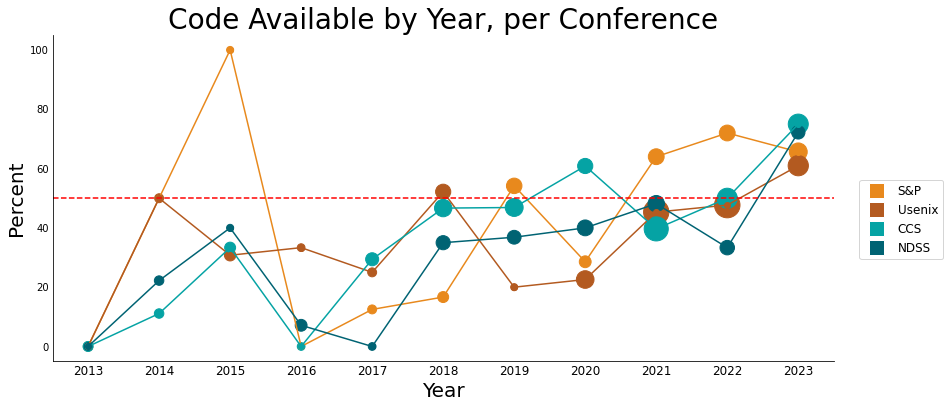

In [6]:
##### FIGURE 12 Code Available  Over Years #######

df = pd.read_csv("sheet1_2023.csv")
# clean conference
conf_dict = {
    "IEEE":"S&P",
    "USEN":"Usenix",
    "ACM": "CCS",
    "NDSS":"NDSS",
    "CCS":"CCS",
    "S&P":"S&P",
    "Usenix":"Usenix"
}

df["Conference"] = [conf_dict[c.upper()[0:4].strip()] for c in df["Conference"]]
small_palette = [
    '#006373',
    '#E8891D',
    '#219ebc',
    '#05A3A4',
    '#EA652C'
]


plt.rcParams["figure.figsize"] = (14,6)
ax = plt.subplot()
# years = [i for i in range(2013,2023)]

ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.set_yticklabels([])
#ax.set_yticks([])
#offset = 5
#ylim = 310
#total_ylim = offset + ylim
#ax.set_ylim(0,total_ylim+7)
col ='#5b7c99'
col1 = '#5b7c99'
colred ='#9e2a2b'

# we will shrink the codes into 0 - no code, 1 - code there, 2 - available in future but never posted,
# 3 - request access
# For now just going off 0 and 1
def convert_label(x):
    if x == -1:
        return 0
    elif x > 2 and x < 7:
        return 1
    elif x == 2:
        return 0
    elif x == 8:
        return 0
    elif x == 7:
        return 2
    else:
        return x
df_temp = df.copy()
df_temp = df.copy()
df_temp["Available"] = df_temp["Available"].apply(convert_label)
df_group = df_temp.groupby(['Conference','Year','Available']).size()


def calculate_percentage_per_year(conference):
    new_df_data = []
    for year in range(2013,2024):
        sum = df_group[conference][year].sum()
        if 0 in df_group[conference][year] or 2 in df_group[conference][year]:
            not_avail = df_group[conference][year][0]
        else:
            not_avail = 0
        if 1 in df_group[conference][year]:
            avail = df_group[conference][year][1]
        else:
            avail = 0

        # Compute the percentage of available papers
        if sum > 0:  # To avoid division by zero
            percentage_avail = (avail / sum) * 100
            percentage_not_avail = (not_avail / sum) * 100
        else:
            percentage_avail = 0
        if year == 2020:
            print("{} avail in 20: {}".format(conference, int(percentage_avail)))
        if year == 2021:
            print("{} avail in 21: {}".format(conference, int(percentage_avail)))
        if year == 2022:
            print("{} avail in 22: {}".format(conference, int(percentage_avail)))
        if year == 2023:
            print("{} avail in 23: {}".format(conference, int(percentage_avail)))

        new_df_data.append({"Year": year, "percentage_avail": percentage_avail, "percentage_not_avail": percentage_not_avail, "Sum": sum})
    return new_df_data


conferences = [
"S&P",
"Usenix",
"CCS",
"NDSS"
]

legend_elements = []

for con in conferences:
    con_df_data = calculate_percentage_per_year(con)
    new_df = pd.DataFrame(con_df_data)
    dot_sizes = new_df["Sum"] * 10  # Example scaling factor
    ax.plot(new_df["Year"], new_df["percentage_avail"], label='Percentage Available {}'.format(con), marker='o', linestyle='-', color=conf_colors_dict[con])
    ax.scatter(new_df["Year"], new_df["percentage_avail"], s=dot_sizes, label='Percentage Available {}'.format(con), marker='o', color=conf_colors_dict[con])
    legend_elements.append(Line2D ([0],[0], marker='s',color='w',markerfacecolor=conf_colors_dict[con],label='{}'.format(con),
        markersize=15))

ax.axhline(y=50, color='r', linestyle='--')

ax.legend(handles=legend_elements, loc='upper left',bbox_to_anchor=(1.025,0.575),prop={'size': 12})


xticks = [y for y in range(2013,2024)] # Expand by one year to 2024
ax.tick_params(axis ='both', which ='both', length = 0)
ax.set_xlabel('Year', fontsize=20)
ax.set_ylabel('Percent', fontsize=20)
ax.set_title('Code Available by Year, per Conference',fontsize=28)
# # xticks.append('Conference Total')
# # xticks.append('Totals')
plt.xticks(xticks, fontsize=12)
plt.savefig("Figure12_trend_code.pdf",bbox_inches='tight')

Data Available

S&P avail in 22: 80
S&P avail in 23: 90
Usenix avail in 22: 76
Usenix avail in 23: 68
CCS avail in 22: 72
CCS avail in 23: 75
NDSS avail in 22: 80
NDSS avail in 23: 94


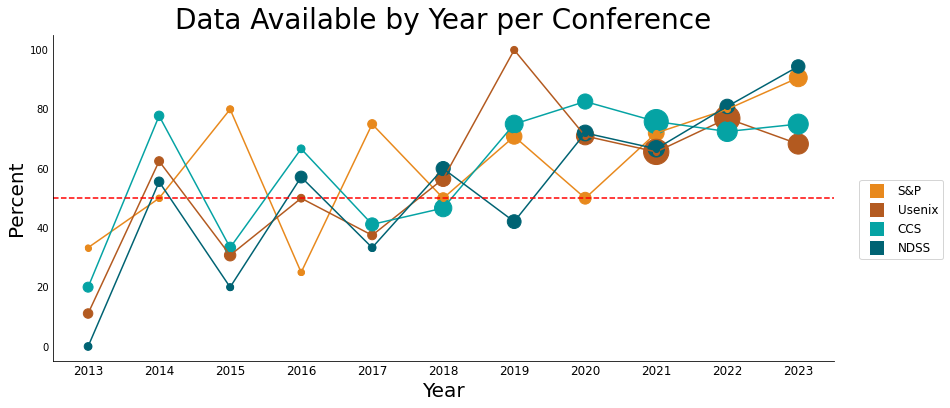

In [175]:
##### FIGURE 13 Data Available Over Years #######

df = pd.read_csv("sheet1_2023.csv")
# clean conference
conf_dict = {
    "IEEE":"S&P",
    "USEN":"Usenix",
    "ACM": "CCS",
    "NDSS":"NDSS",
    "CCS":"CCS",
    "S&P":"S&P",
    "Usenix":"Usenix"
}# # xticks.append('Conference Total')
# # xticks.append('Totals'))[0:4].strip()] for c in df["Conference"]]
small_palette = [
    '#006373',
    '#E8891D',
    '#219ebc',
    '#05A3A4',
    '#EA652C'
]
# small_palette = np.flip(small_palette)
# df = df[~df['Runs'].isna()]
# df['Runs'] = df['Runs'].astype(int)

## Define our subplots
# fig, axs = plt.subplots(4,10, sharex=True, sharey=True)
# fig

plt.rcParams["figure.figsize"] = (14,6)
ax = plt.subplot()
# years = [i for i in range(2013,2023)]

ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.set_yticklabels([])
#ax.set_yticks([])
#offset = 5
#ylim = 310
#total_ylim = offset + ylim
#ax.set_ylim(0,total_ylim+7)
col ='#5b7c99'
col1 = '#5b7c99'
colred ='#9e2a2b'


## Making the small slices
# -1: Not Applicable
# 0: Dataset Unavailable
# 1: Dataset is linked
# 2: Request Access
# 3: Multiple Datasets unavailable, some are
# 4: Public Only
# 5: Dataset Offered in Future
# 6: Incomplete Single Dataset
# 7: Processed Data in Repository
# 8: Broken Link
#Converting Data Labels
# 0 - Not available
# 1 - Available in some form


def convert_label(x):
    if x == -1:
        return 0
    elif x == 0:
        return 0# # xticks.append('Conference Total')
# # xticks.append('Totals')
    elif x == 4:
        return 1
    elif x>0 & x<4:
        return 1
    elif x == 8:
        return 0
    elif x>4 & x <8:
        return 1
    else:
        return 0
df_temp = df.copy()

df_temp["Data_Available"] = df_temp["Data_Available"].fillna(-1)
df_temp["Data_Available"] = df_temp["Data_Available"].astype('int64')
df_temp["Data_Available"] = df_temp["Data_Available"].apply(convert_label)
df_group = df_temp.groupby(['Conference','Year','Data_Available']).size()


def calculate_percentage_per_year(conference):
    new_df_data = []
    try:
        for year in range(2013,2024):
            sum = df_group[conference][year].sum()
            if 0 in df_group[conference][year] or 2 in df_group[conference][year]:
                not_avail = df_group[conference][year][0]
            else:
                not_avail = 0
            if 1 in df_group[conference][year]:
                avail = df_group[conference][year][1]
            else:
                avail = 0
            # Compute the percentage of available papers
            if sum > 0:  # To avoid division by zero
                percentage_avail = (avail / sum) * 100
                percentage_not_avail = (not_avail / sum) * 100
            else:
                percentage_avail = 0
            if year == 2022:
                print("{} avail in 22: {}".format(conference, int(percentage_avail)))
            if year == 2023:
                print("{} avail in 23: {}".format(conference, int(percentage_avail)))
            new_df_data.append({"Year": year, "percentage_avail": percentage_avail, "percentage_not_avail": percentage_not_avail, "Sum": sum})
    except KeyError as e:
        print(conference)
        return None
    return new_df_data


conferences = [
"S&P",
"Usenix",
"CCS",
"NDSS"
]

legend_elements = []

for con in conferences:
    con_df_data = calculate_percentage_per_year(con)
    if con_df_data:
        new_df = pd.DataFrame(con_df_data)
        dot_sizes = new_df["Sum"] * 10  # Example scaling factor
        ax.plot(new_df["Year"], new_df["percentage_avail"], label='Percentage Available {}'.format(con), marker='o', linestyle='-', color=conf_colors_dict[con])
        ax.scatter(new_df["Year"], new_df["percentage_avail"], s=dot_sizes, label='Percentage Available {}'.format(con), marker='o', color=conf_colors_dict[con])
        legend_elements.append(Line2D ([0],[0], marker='s',color='w',markerfacecolor=conf_colors_dict[con],label='{}'.format(con),
            markersize=15))

ax.axhline(y=50, color='r', linestyle='--')

ax.legend(handles=legend_elements, loc='upper left',bbox_to_anchor=(1.025,0.575),prop={'size': 12})


xticks = [y for y in range(2013,2024)] # Expand by one year to 2024
ax.tick_params(axis ='both', which ='both', length = 0)
ax.set_xlabel('Year', fontsize=20)
ax.set_ylabel('Percent', fontsize=20)
ax.set_title('Data Available by Year per Conference',fontsize=28)
plt.xticks(xticks, fontsize=12)
plt.savefig("Figure13_trend_data.pdf",bbox_inches='tight')

Hyperparameters

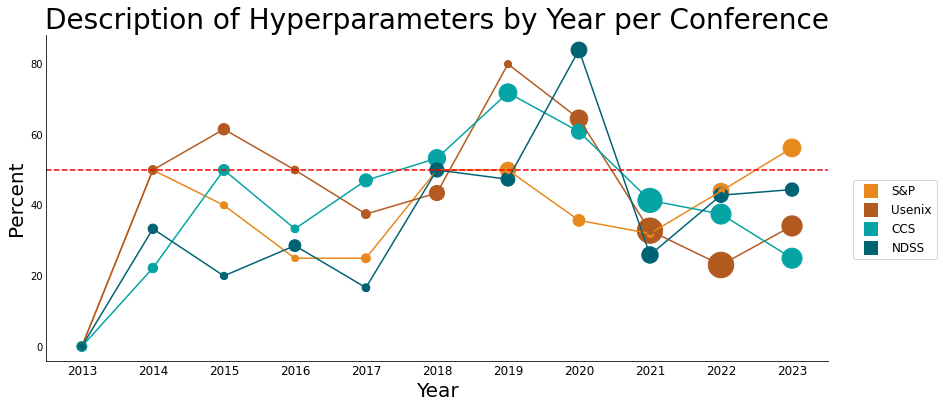

In [176]:
##### FIGURE 14 Hyperparameters  Over Years #######

df = pd.read_csv("sheet1_2023.csv")
# clean conference
conf_dict = {
    "IEEE":"S&P",
    "USEN":"Usenix",
    "ACM": "CCS",
    "NDSS":"NDSS",
    "CCS":"CCS",
    "S&P":"S&P",
    "Usenix":"Usenix"
}


plt.rcParams["figure.figsize"] = (14,6)
ax = plt.subplot()
# years = [i for i in range(2013,2023)]

ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)



## Making the small slices
# -1: Not Applicable
# 0: Not described
# 1: Partially Described
# 2: Described
#Converting Data Labels
# 0 - Not Described
# 1 - Described

def convert_label(x):
    if x == -1:
        return 0
    if x == 2:
        return 1
    else:
        return 0
df_temp = df.copy()

df_temp["Hyperparameters"] = df_temp["Hyperparameters"].fillna(-1)
df_temp["Hyperparameters"] = df_temp["Hyperparameters"].astype('int64')
df_temp["Hyperparameters"] = df_temp["Hyperparameters"].apply(convert_label)
df_group = df_temp.groupby(['Conference','Year','Hyperparameters']).size()


def calculate_percentage_per_year(conference):
    new_df_data = []
    try:
        for year in range(2013,2024):
            sum = df_group[conference][year].sum()
            if 0 in df_group[conference][year] or 2 in df_group[conference][year]:
                not_avail = df_group[conference][year][0]
            else:
                not_avail = 0
            if 1 in df_group[conference][year]:
                avail = df_group[conference][year][1]
            else:
                avail = 0

            # Compute the percentage of available papers
            if sum > 0:  # To avoid division by zero
                percentage_avail = (avail / sum) * 100
                percentage_not_avail = (not_avail / sum) * 100
            else:
                percentage_avail = 0
            new_df_data.append({"Year": year, "percentage_avail": percentage_avail, "percentage_not_avail": percentage_not_avail, "Sum": sum})
    except KeyError as e:
        print(conference)
        return None
    return new_df_data


conferences = [
"S&P",
"Usenix",
"CCS",
"NDSS"
]

legend_elements = []

for con in conferences:
    con_df_data = calculate_percentage_per_year(con)
    if con_df_data:
        new_df = pd.DataFrame(con_df_data)
        dot_sizes = new_df["Sum"] * 10  # Example scaling factor
        ax.plot(new_df["Year"], new_df["percentage_avail"], label='Percentage Available {}'.format(con), marker='o', linestyle='-', color=conf_colors_dict[con])
        ax.scatter(new_df["Year"], new_df["percentage_avail"], s=dot_sizes, label='Percentage Available {}'.format(con), marker='o', color=conf_colors_dict[con])
        legend_elements.append(Line2D ([0],[0], marker='s',color='w',markerfacecolor=conf_colors_dict[con],label='{}'.format(con),
            markersize=15))

ax.axhline(y=50, color='r', linestyle='--')

ax.legend(handles=legend_elements, loc='upper left',bbox_to_anchor=(1.025,0.575),prop={'size': 12})


xticks = [y for y in range(2013,2024)] # Expand by one year to 2024
ax.tick_params(axis ='both', which ='both', length = 0)
ax.set_xlabel('Year', fontsize=20)
ax.set_ylabel('Percent', fontsize=20)
ax.set_title('Description of Hyperparameters by Year per Conference',fontsize=28)
plt.xticks(xticks, fontsize=12)
plt.savefig("Figure14_trend_hyper.pdf",bbox_inches='tight')

Method

[{'Year': 2013, 'percentage_avail': 0.0, 'percentage_not_avail': 100.0, 'Sum': 3}, {'Year': 2014, 'percentage_avail': 100.0, 'percentage_not_avail': 0.0, 'Sum': 4}, {'Year': 2015, 'percentage_avail': 40.0, 'percentage_not_avail': 60.0, 'Sum': 5}, {'Year': 2016, 'percentage_avail': 50.0, 'percentage_not_avail': 50.0, 'Sum': 4}, {'Year': 2017, 'percentage_avail': 75.0, 'percentage_not_avail': 25.0, 'Sum': 8}, {'Year': 2018, 'percentage_avail': 58.333333333333336, 'percentage_not_avail': 41.66666666666667, 'Sum': 12}, {'Year': 2019, 'percentage_avail': 62.5, 'percentage_not_avail': 37.5, 'Sum': 24}, {'Year': 2020, 'percentage_avail': 57.14285714285714, 'percentage_not_avail': 42.857142857142854, 'Sum': 14}, {'Year': 2021, 'percentage_avail': 44.0, 'percentage_not_avail': 56.00000000000001, 'Sum': 25}, {'Year': 2022, 'percentage_avail': 64.0, 'percentage_not_avail': 36.0, 'Sum': 25}, {'Year': 2023, 'percentage_avail': 65.625, 'percentage_not_avail': 34.375, 'Sum': 32}]
S&P
[{'Year': 2013, 

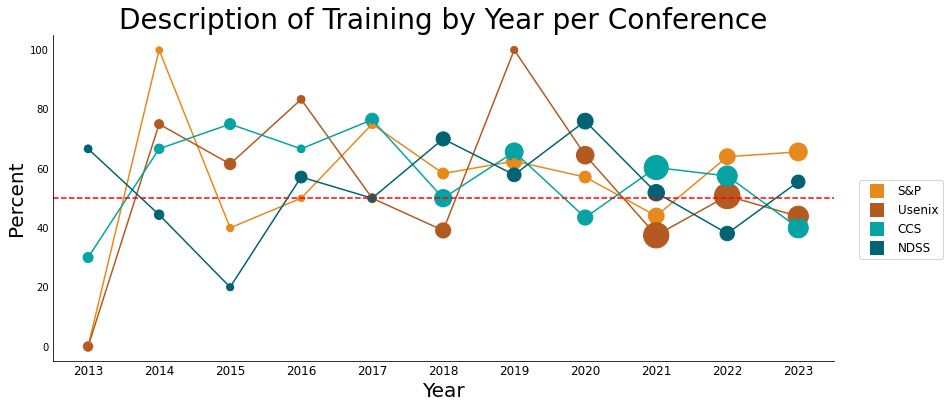

In [177]:
##### FIGURE 14 Hyperparameters  Over Years #######

df = pd.read_csv("sheet1_2023.csv")
# clean conference
conf_dict = {
    "IEEE":"S&P",
    "USEN":"Usenix",
    "ACM": "CCS",
    "NDSS":"NDSS",
    "CCS":"CCS",
    "S&P":"S&P",
    "Usenix":"Usenix"
}

df["Conference"] = [conf_dict[c.upper()[0:4].strip()] for c in df["Conference"]]
small_palette = [
    '#006373',
    '#E8891D',
    '#219ebc',
    '#05A3A4',
    '#EA652C'
]
# small_palette = np.flip(small_palette)
# df = df[~df['Runs'].isna()]
# df['Runs'] = df['Runs'].astype(int)

## Define our subplots
# fig, axs = plt.subplots(4,10, sharex=True, sharey=True)
# fig

plt.rcParams["figure.figsize"] = (14,6)
ax = plt.subplot()
# years = [i for i in range(2013,2023)]

ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.set_yticklabels([])
#ax.set_yticks([])
#offset = 5
#ylim = 310
#total_ylim = offset + ylim
#ax.set_ylim(0,total_ylim+7)
col ='#5b7c99'
col1 = '#5b7c99'
colred ='#9e2a2b'


## Making the small slices
# -1: Not Applicable
# 0: Not described
# 1: Partially Described
# 2: Described
#Converting Data Labels
# 0 - Not Described
# 1 - Described

def convert_label(x):
    if x == -1:
        return 0
    if x == 2:
        return 1
    else:
        return 0
df_temp = df.copy()

df_temp["Training Described"] = df_temp["Training Described"].fillna(-1)
df_temp["Training Described"] = df_temp["Training Described"].astype('int64')
df_temp["Training Described"] = df_temp["Training Described"].apply(convert_label)
df_group = df_temp.groupby(['Conference','Year','Training Described']).size()


def calculate_percentage_per_year(conference):
    new_df_data = []
    try:
        for year in range(2013,2024):
            sum = df_group[conference][year].sum()
            if 0 in df_group[conference][year] or 2 in df_group[conference][year]:
                not_avail = df_group[conference][year][0]
            else:
                not_avail = 0
            if 1 in df_group[conference][year]:
                avail = df_group[conference][year][1]
            else:
                avail = 0
            # Compute the percentage of available papers
            if sum > 0:  # To avoid division by zero
                percentage_avail = (avail / sum) * 100
                percentage_not_avail = (not_avail / sum) * 100
            else:
                percentage_avail = 0
            new_df_data.append({"Year": year, "percentage_avail": percentage_avail, "percentage_not_avail": percentage_not_avail, "Sum": sum})
    except KeyError as e:
        print(conference, e)
        return None
    return new_df_data


conferences = [
"S&P",
"Usenix",
"CCS",
"NDSS"
]

legend_elements = []

for con in conferences:
    con_df_data = calculate_percentage_per_year(con)
    print(con_df_data)
    if con_df_data:
        print(con)
        new_df = pd.DataFrame(con_df_data)
        dot_sizes = new_df["Sum"] * 10  # Example scaling factor
        ax.plot(new_df["Year"], new_df["percentage_avail"], label='Percentage Available {}'.format(con), marker='o', linestyle='-', color=conf_colors_dict[con])
        ax.scatter(new_df["Year"], new_df["percentage_avail"], s=dot_sizes, label='Percentage Available {}'.format(con), marker='o', color=conf_colors_dict[con])
        legend_elements.append(Line2D ([0],[0], marker='s',color='w',markerfacecolor=conf_colors_dict[con],label='{}'.format(con),
            markersize=15))
    else:
        print("WTF")

ax.axhline(y=50, color='r', linestyle='--')

ax.legend(handles=legend_elements, loc='upper left',bbox_to_anchor=(1.025,0.575),prop={'size': 12})


xticks = [y for y in range(2013,2024)] # Expand by one year to 2024
ax.tick_params(axis ='both', which ='both', length = 0)
ax.set_xlabel('Year', fontsize=20)
ax.set_ylabel('Percent', fontsize=20)
ax.set_title('Description of Training by Year per Conference',fontsize=28)
# # xticks.append('Conference Total')
# # xticks.append('Totals')
plt.xticks(xticks, fontsize=12)
plt.savefig("Figure15_trend_train.pdf",bbox_inches='tight')